In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [5]:
DATA_DIR = r"C:\Users\shash\OneDrive\Documents\Brain-MRI\brain_tumor_organized"  # ⬅️ Your dataset path

# Auto-detect Training/Testing folders (case-insensitive)
if os.path.exists(DATA_DIR):
    entries = os.listdir(DATA_DIR)
    train_folder = None
    test_folder = None
    # First pass: look for explicit 'train'/'training' and 'test'/'testing' folders
    for name in entries:
        p = os.path.join(DATA_DIR, name)
        if os.path.isdir(p):
            nl = name.lower()
            if nl in ('train', 'training'):
                train_folder = p
            if nl in ('test', 'testing'):
                test_folder = p

    if train_folder:
        TRAIN_DIR = train_folder
        TEST_DIR = test_folder
    else:
        # If no explicit train folder, check whether DATA_DIR contains class folders with images
        found_class = False
        for name in entries:
            p = os.path.join(DATA_DIR, name)
            if os.path.isdir(p):
                files = os.listdir(p)
                if any(f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')) for f in files):
                    found_class = True
                    break
        if found_class:
            TRAIN_DIR = DATA_DIR
            TEST_DIR = None
        else:
            # As a fallback, try to find a nested train folder (e.g., dataset/train/...)
            TRAIN_DIR = DATA_DIR
            TEST_DIR = None

else:
    raise FileNotFoundError(f"❌ Dataset not found at: {DATA_DIR}\n\nPlease update DATA_DIR on line 18!")

# Output directory for saving plots
OUTPUT_DIR = './eda_plots/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("="*60)
print("BRAIN TUMOR MRI - EXPLORATORY DATA ANALYSIS")
print("="*60)

BRAIN TUMOR MRI - EXPLORATORY DATA ANALYSIS


In [6]:
def get_dataset_info(data_dir):
    """Get information about dataset structure"""
    info = {}
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            info[class_name] = len(images)
    
    return info

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

train_info = get_dataset_info(TRAIN_DIR)
print(f"\nTraining Set:")
for class_name, count in train_info.items():
    print(f"  {class_name}: {count} images")

if TEST_DIR and os.path.exists(TEST_DIR):
    test_info = get_dataset_info(TEST_DIR)
    print(f"\nTesting Set:")
    for class_name, count in test_info.items():
        print(f"  {class_name}: {count} images")


DATASET OVERVIEW

Training Set:
  glioma: 1134 images
  meningioma: 1151 images
  notumor: 1400 images
  pituitary: 1229 images

Testing Set:
  glioma: 244 images
  meningioma: 248 images
  notumor: 300 images
  pituitary: 265 images


In [17]:
print(f"Dataset folder: {TRAIN_DIR}")
print(f"Folder contents: {os.listdir(TRAIN_DIR)}")

Dataset folder: C:\Users\shash\OneDrive\Documents\Brain-MRI
Folder contents: ['best_brain_tumor_model.keras', 'brain_tumor_organized', 'eda.ipynb', 'eda_plots', 'model.ipynb', 'training_history.png']


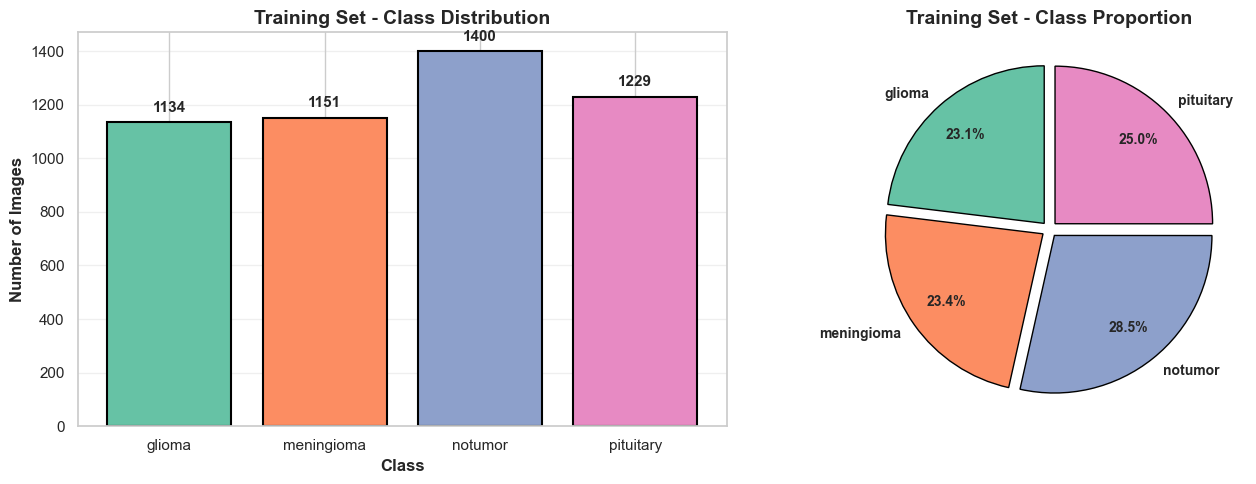


✓ Plot saved: 1_class_distribution.png


In [12]:
import matplotlib.gridspec as gridspec

# Fresh figure using GridSpec for reliable layout
fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)
ax_bar = fig.add_subplot(gs[0, 0])
ax_pie = fig.add_subplot(gs[0, 1])

# Bar plot on the left
classes = list(train_info.keys())
counts = list(train_info.values())
colors = sns.color_palette("Set2", len(classes))

ax_bar.bar(classes, counts, color=colors, edgecolor='black', linewidth=1.5)
ax_bar.set_xlabel('Class', fontsize=12, fontweight='bold')
ax_bar.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax_bar.set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
ax_bar.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (cls, cnt) in enumerate(zip(classes, counts)):
    ax_bar.text(i, cnt + max(counts)*0.02, str(cnt), ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie plot on the right — robust handling
total = sum(counts)
if total > 0:
    counts_int = [int(c) for c in counts]
    explode = [0.05] * len(counts_int)
    wedges, texts, autotexts = ax_pie.pie(
        counts_int,
        labels=classes,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=explode,
        wedgeprops=dict(edgecolor='black'),
        pctdistance=0.75
    )
    for t in texts + autotexts:
        t.set_fontsize(10)
        t.set_fontweight('bold')
    ax_pie.set_title('Training Set - Class Proportion', fontsize=14, fontweight='bold')
    ax_pie.set_aspect('equal')
else:
    ax_pie.text(0.5, 0.5, 'No images found in the detected training directory\ncheck TRAIN_DIR', ha='center', va='center', fontsize=12)
    ax_pie.set_axis_off()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, '1_class_distribution.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Plot saved: 1_class_distribution.png")

In [13]:
# Pie chart
# Replace the right-hand axis with a fresh axes instance at the same position to ensure the pie renders reliably
pos = axes[1].get_position()
axes[1].remove()
ax_pie = fig.add_axes(pos)

# Compute totals and draw pie if images exist
total = sum(counts)
if total > 0:
    counts_int = [int(c) for c in counts]
    explode = [0.05] * len(counts_int)
    wedges, texts, autotexts = ax_pie.pie(
        counts_int,
        labels=classes,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=explode,
        wedgeprops=dict(edgecolor='black'),
        pctdistance=0.75
    )
    # Style label and percent text
    for t in texts + autotexts:
        t.set_fontsize(10)
        t.set_fontweight('bold')
    ax_pie.set_title('Training Set - Class Proportion', fontsize=14, fontweight='bold')
    ax_pie.set_aspect('equal')
else:
    ax_pie.text(0.5, 0.5, 'No images found in the detected training directory\ncheck TRAIN_DIR',
                ha='center', va='center', fontsize=12)
    ax_pie.set_axis_off()

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, '1_class_distribution.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Plot saved: 1_class_distribution.png")

<Figure size 1500x1000 with 0 Axes>


✓ Plot saved: 1_class_distribution.png


# EDA — Run analysis and display plots

This notebook runs `eda_analysis.py`, shows the generated `class_counts.csv`, and embeds the plots from `eda_plots`.

In [1]:
# Run the EDA script (creates files in eda_plots)
import runpy
print('Running eda_analysis.py...')
runpy.run_path('eda_analysis.py', run_name='__main__')

Running eda_analysis.py...
Saved class counts to: eda_plots\class_counts.csv
Total images found: 7023


eda_analysis.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cls_names, y=counts, palette="muted")


EDA complete. Plots written to eda_plots


{'__name__': '__main__',
 '__doc__': None,
 '__package__': '',
 '__loader__': None,
 '__spec__': None,
 '__file__': 'eda_analysis.py',
 '__cached__': None,
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__(name, globals=None, locals=None, fromlist=(), level=0)>,
  'abs': <function ab


Class counts (from eda_plots/class_counts.csv):


,class,test,train,val,total
0,glioma,244,1134,243,1621
1,meningioma,248,1151,246,1645
2,notumor,300,1400,300,2000
3,pituitary,265,1229,263,1757


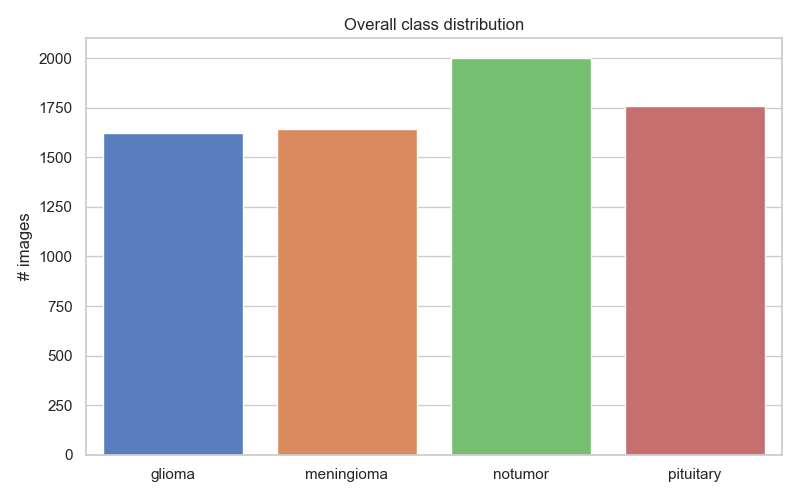

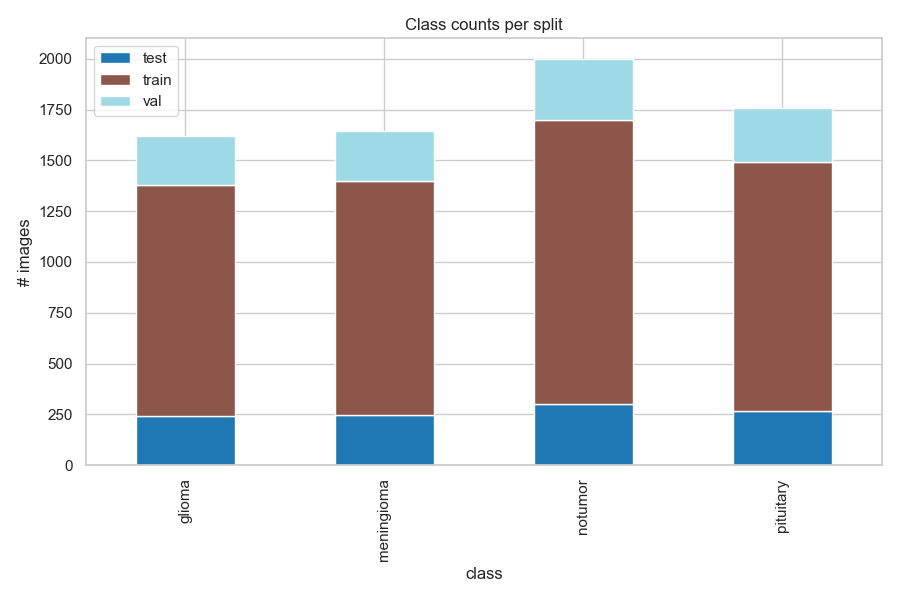

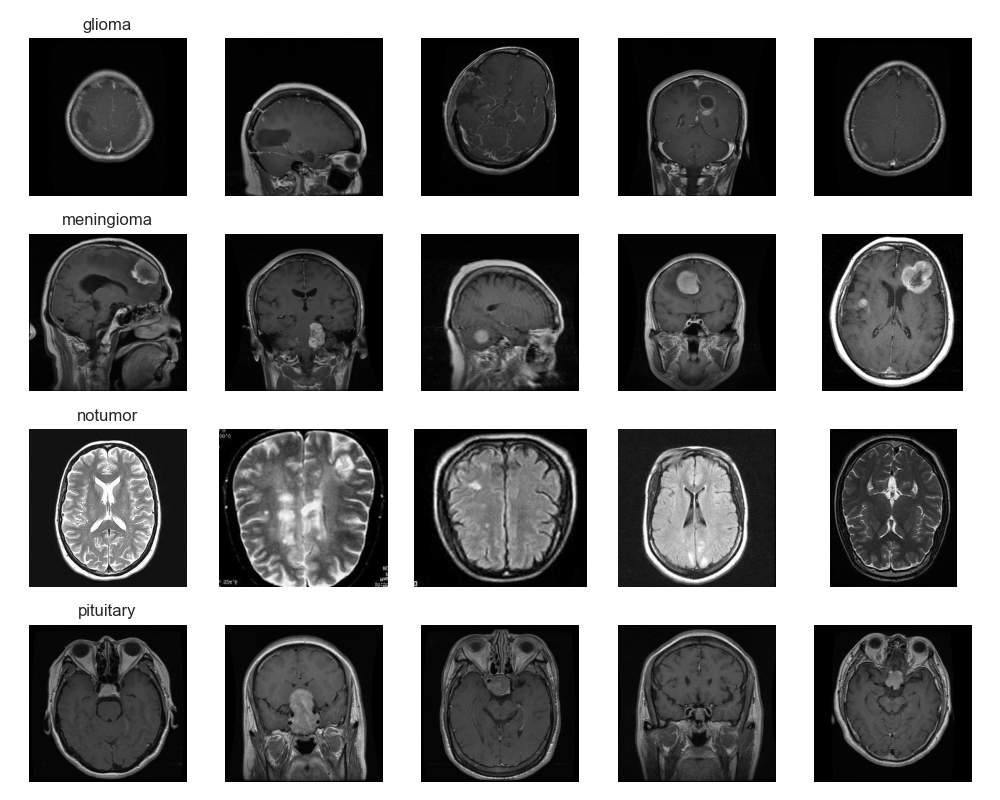

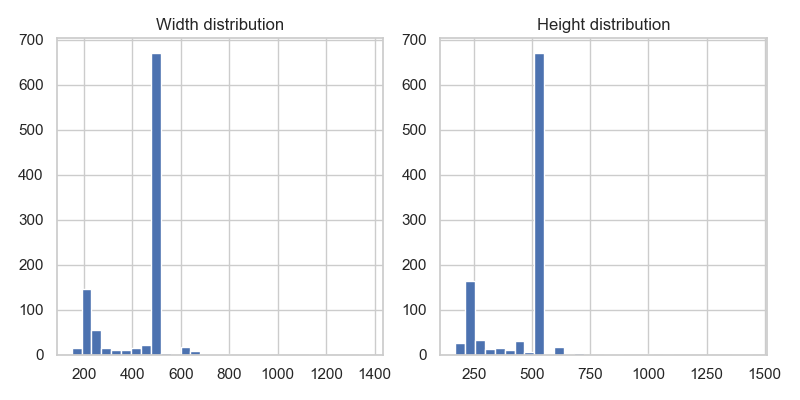

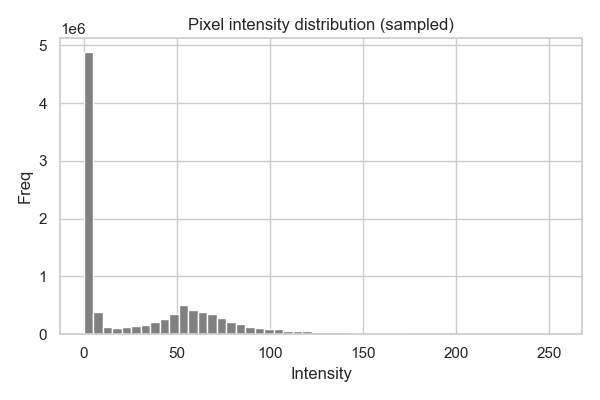

In [14]:
# Display class counts and plots
import pandas as pd
from IPython.display import Image, display

print('\nClass counts (from eda_plots/class_counts.csv):')
df = pd.read_csv('eda_plots/class_counts.csv')
display(df)

imgs = [
    'eda_plots/class_distribution_overall.png',
    'eda_plots/class_counts_per_split.png',
    'eda_plots/samples_grid.png',
    'eda_plots/image_size_distribution.png',
    'eda_plots/pixel_intensity_hist.png',
]

for p in imgs:
    try:
        display(Image(filename=p))
    except Exception as e:
        print('Could not load', p, e)

## EDA summary ✅

**Key numbers**
- Total images: **7023**
- Per-class totals: **notumor 2000**, **pituitary 1757**, **meningioma 1645**, **glioma 1621**

**Observations**
- Dataset is reasonably balanced but **`notumor` is noticeably larger** than each tumor class.
- Most images have a common size peak (see size distribution) — consider resizing to a fixed resolution before training.
- Pixel intensities are skewed with a large low-intensity mass; normalize intensities (e.g., min-max or z-score) before feeding to models.

**Recommended next steps**
1. Decide a target input size (e.g., 224 or 512) and add resizing pipeline + augmentation for tumor classes.
2. Save a short report (PDF/Markdown) with these plots and the class counts for documentation.
3. Optionally compute per-class brightness/contrast stats or per-split stratified augmentation if you want cost-sensitive training.

*If you want, I can add these cells and compute per-class intensity summaries next.*